# 1. Loading The Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from warnings import filterwarnings
filterwarnings('ignore')

# 2. Reading Data

In [3]:
data=pd.read_csv('/content/car_price_prediction.csv')

In [4]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


## 3.Exploratory Data Analysis and Data Cleaning



In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
data.shape

(19237, 18)

Finding Unique Values For Each Column

In [7]:
for col in data.columns:
    print(col)
    print(data[f'{col}'].unique())

ID
[45654403 44731507 45774419 ... 45804997 45793526 45813273]
Price
[13328 16621  8467 ... 56814 63886 22075]
Levy
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '14

1. From the above output, we can see that 'Levy', 'Engine Volume','Mileage' have object data type. But as per the data definition, they are numerical variables, so we need to convert these variables data type to 'number'.


2. We also see that '-' values is used in the Levy column instead of null values so we will replace them.


In [8]:
# Replacing '-' with null
data['Levy'].replace({'-':np.nan}, inplace = True)
# Converting the data in levy to float
data['Levy'] = data['Levy'].astype('float64')

3. We want to convert the Engine column type to float in order to do that we need to strip the 'turbo' word in them.


In [9]:
# Making sure that we don miss anything so making everything lower first
data['Engine volume'] = data['Engine volume'].str.lower()

# Slicing engine volumes and converting type to float
data['Engine volume'] = data['Engine volume'].str.slice(0,3)
data['Engine volume'] = data['Engine volume'].astype('float64')

4. ***Mileage*** in order to convert it to ***integer***, we need to strip ***'km'*** in them. 


In [10]:
#Mileage as well in order to convert the type of this column to integer, we need to strip 'km' in them. 
data['Mileage'] = data['Mileage'].str.strip('km')
data['Mileage'] = data['Mileage'].astype('int64')

5. Replace: Yes >> True , No >> False in Leather Interior

In [11]:
# Replacement: Yes >> True , No >> False
data['Leather interior'].replace({'Yes': True, 'No':False}, inplace=True)

6. The 'Doors' column has these unique values '04-May', '02-Mar', '>5' so respectively we will replace them to 4, 2 and 5.

In [12]:
data['Doors'].replace({'04-May':'Four', '02-Mar':'Two', '>5':'Five'}, inplace=True)
data.Doors.value_counts()

Four    18332
Two       777
Five      128
Name: Doors, dtype: int64

7. Now we are converting production year to categorical columns as generation type.

In [13]:
data['Generation'] = list(map((lambda x: ('Post_war') if (x<1945) else ('Boomers-I') if (x>=1946 and x <=1954) else ('Boomers-II') if (x>= 1955 and x<= 1964) else ('Gen-X') if  (x>=1965 and x<=1980) else ('Milennials') if (x >= 1981 and x <= 1996) else ('Gen-Z')),data['Prod. year']))
data['Generation']= data['Generation'].astype('O')

In [14]:
data['Generation'].value_counts()

Gen-Z         18826
Milennials      386
Gen-X            13
Boomers-I         5
Post_war          4
Boomers-II        3
Name: Generation, dtype: int64

In [15]:
# Dropping the ID column which will not provide any information for our model
data = data.drop('ID', axis=1)

2. Find Missing Values

In [16]:
miss_val=data.isnull().sum()
miss_val[miss_val>0]

Levy    5819
dtype: int64

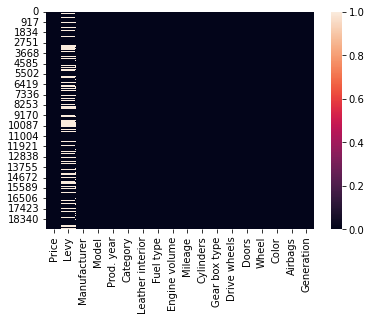

In [17]:
sns.heatmap(data.isnull())

In [18]:
missing_levy=data['Levy'].median()


In [19]:
data['Levy'].replace(np.nan,missing_levy,inplace=True)

In [20]:
miss_val=data.isnull().sum()
miss_val[miss_val>0]

Series([], dtype: int64)

In [21]:
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Generation
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,Four,Left wheel,Silver,12,Gen-Z
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,Four,Left wheel,Black,8,Gen-Z
2,8467,781.0,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,Four,Right-hand drive,Black,2,Gen-Z
3,3607,862.0,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,Four,Left wheel,White,0,Gen-Z
4,11726,446.0,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,Four,Left wheel,Silver,4,Gen-Z


In [22]:
data.shape

(19237, 18)

3.  Droping Duplicate Rows

In [23]:
# Finding Duplicated Rows
print(data[data.duplicated()])
print("No of duplicated rows ",data.duplicated().sum())


       Price    Levy   Manufacturer    Model  Prod. year Category  \
192      314  1053.0  MERCEDES-BENZ    E 350        2014    Sedan   
239     2901   503.0          HONDA    Civic        2012    Sedan   
264      392  1017.0  MERCEDES-BENZ    E 300        2017    Sedan   
331      282   289.0           FORD   Escape        2008     Jeep   
347    39829  1811.0          LEXUS   GX 460        2010     Jeep   
...      ...     ...            ...      ...         ...      ...   
19222  10036   639.0        HYUNDAI   Sonata        2014    Sedan   
19227  29793  1053.0  MERCEDES-BENZ    E 350        2014    Sedan   
19228    706  1850.0  MERCEDES-BENZ    E 350        2008    Sedan   
19231   5802  1055.0  MERCEDES-BENZ    E 350        2013    Sedan   
19235   5331  1288.0      CHEVROLET  Captiva        2007     Jeep   

       Leather interior Fuel type  Engine volume  Mileage  Cylinders  \
192                True    Diesel            3.5   149486        6.0   
239                True    

In [24]:
data = data.drop_duplicates(keep='first')


In [25]:
print(f'After Dropping Duplicates we got {data.shape[0]} rows.')

After Dropping Duplicates we got 15725 rows.


Finding Numerical Features

In [26]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if (data[feature].dtypes != 'O') and (data[feature].dtypes != 'bool') ]

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  7


,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
0,13328,1399.0,2010,3.5,186005,6.0,12
1,16621,1018.0,2011,3.0,192000,6.0,8
2,8467,781.0,2006,1.3,200000,4.0,2
3,3607,862.0,2011,2.5,168966,4.0,0
4,11726,446.0,2014,1.3,91901,4.0,4


In [27]:
data[numerical_features].describe()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,1.572500e+04,15725.000000,15725.000000,15725.000000,1.572500e+04,15725.000000,15725.000000
mean,2.027944e+04,843.857742,2010.518919,2.212820,1.836421e+06,4.483561,6.543339
std,2.106390e+05,369.630303,6.012122,0.806187,5.353248e+07,1.134466,4.067728
min,1.000000e+00,87.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,7.527000e+03,746.000000,2008.000000,1.700000,6.657500e+04,4.000000,4.000000
50%,1.416600e+04,781.000000,2012.000000,2.000000,1.210000e+05,4.000000,6.000000
75%,2.336400e+04,862.000000,2014.000000,2.500000,1.800000e+05,4.000000,12.000000
max,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


The descriptive statistics shows that the Prices, Levy, Mileage, Cylinders and Airbags probably have right skewed distribution because the means of these attributes are bigger than the medians. On the other hand, Prod. year looks like left skewed distribution.

In [28]:
# we can see that there are any used car with a price under the 1000$, this is illogical
# we will keep only cars with price greater than 1000 $
df=data.copy()
df = df[df['Price'] > 1000]
df.shape 


(14320, 18)

In [29]:
data.Price.sort_values(ascending=False)

16983    26307500
8541       872946
1225       627220
5008       308906
14839      297930
           ...   
15347           3
9730            3
11636           3
16992           1
7815            1
Name: Price, Length: 15725, dtype: int64

In [30]:
# The Maximum Price is too high as compared to other prices. So we will delete it.
df=data.copy()
df.drop(df[(df['Price']==df.Price.max())].index, inplace=True)
df.shape
data=df.copy()

Finding Outliers

From descriptive statistics we see there are very high and low values in Mileage and Price.We will make outlier detection to get rid of some of these values.

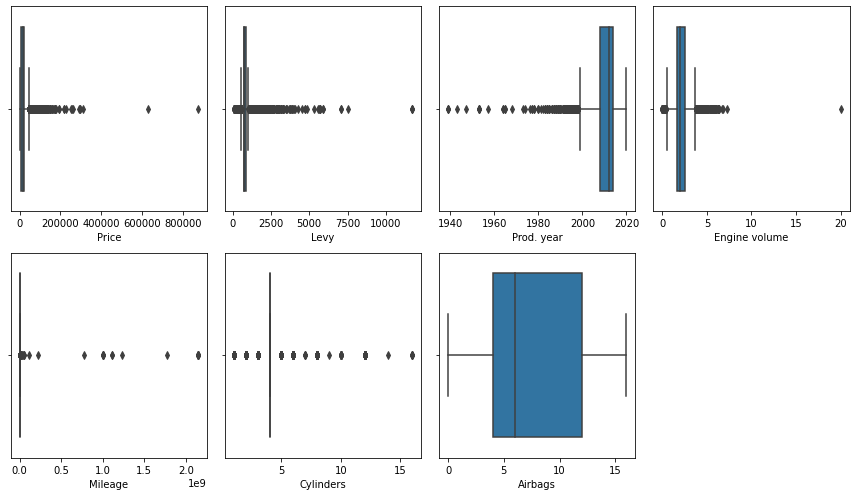

In [31]:
plt.figure(figsize=[12,7])
for i,j in enumerate(numerical_features):
    plt.subplot(2,4,i+1)
    sns.boxplot(df[j])
    plt.tight_layout()
plt.show()

Treating Outliers

In [32]:
out_col=['Mileage','Engine volume','Levy','Cylinders','Price']
df=data.copy()

In [33]:
def fill_outliers(data, col):

    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    #lower bound is Quartile1-(1.5*IQR)
    lb=Q1-1.5*IQR
    # upper bound is Quartile3+(1.5*IQR)
    ub=Q3+1.5*IQR

    df.loc[(data[col] < lb), col] = lb
    df.loc[(data[col] > ub),  col] = ub
    
    return data

In [34]:
for i in out_col:
     fill_outliers(df, i)

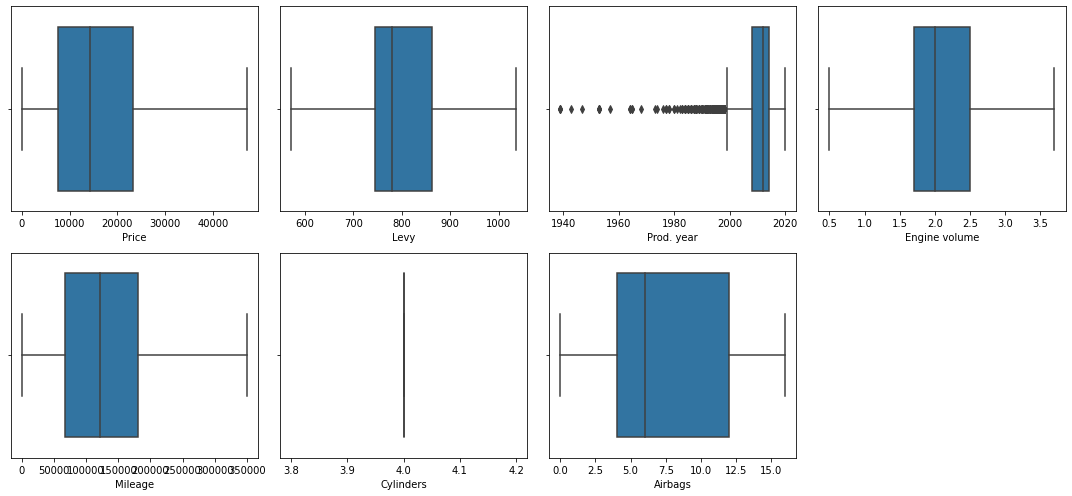

In [35]:
plt.figure(figsize=[15,7])
for i,j in enumerate(numerical_features):
    plt.subplot(2,4,i+1)
    sns.boxplot(df[j])
    plt.tight_layout()
plt.show()

In [36]:
data=df.copy()

# Visualizations

In [37]:
# list of numerical variables
categorical_features = [feature for feature in data.columns if (data[feature].dtypes == 'O') ]
print('Number of numerical variables: ', len(categorical_features ))

# visualise the numerical variables
data[categorical_features].head()

Number of numerical variables:  10


,Manufacturer,Model,Category,Fuel type,Gear box type,Drive wheels,Doors,Wheel,Color,Generation
0,LEXUS,RX 450,Jeep,Hybrid,Automatic,4x4,Four,Left wheel,Silver,Gen-Z
1,CHEVROLET,Equinox,Jeep,Petrol,Tiptronic,4x4,Four,Left wheel,Black,Gen-Z
2,HONDA,FIT,Hatchback,Petrol,Variator,Front,Four,Right-hand drive,Black,Gen-Z
3,FORD,Escape,Jeep,Hybrid,Automatic,4x4,Four,Left wheel,White,Gen-Z
4,HONDA,FIT,Hatchback,Petrol,Automatic,Front,Four,Left wheel,Silver,Gen-Z


In [38]:
len(data['Manufacturer'].unique())

65

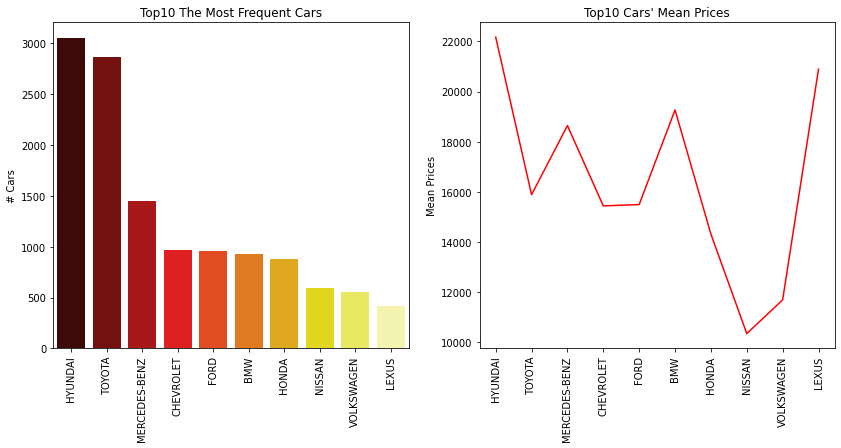

In [39]:
top10_cars = data['Manufacturer'].value_counts().sort_values(ascending = False)[:10]
top10_mean_prices = [data[data['Manufacturer'] == i]['Price'].mean() for i in list(top10_cars.index)]

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
sns.barplot(top10_cars.index, top10_cars.values, palette='hot')
plt.xticks(rotation = 90)
plt.ylabel('# Cars')
plt.title('Top10 The Most Frequent Cars')

ax2 = fig.add_subplot(122)
sns.lineplot(top10_cars.index, top10_mean_prices, color='r')
plt.xticks(rotation = 90)
plt.ylabel('Mean Prices')
plt.title("Top10 Cars' Mean Prices")
plt.show()

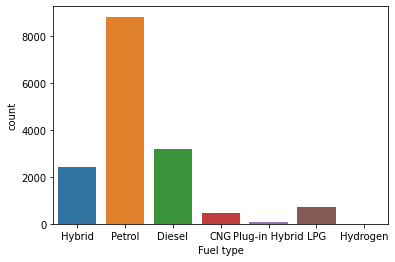

In [40]:
sns.countplot(data=data,x='Fuel type')   

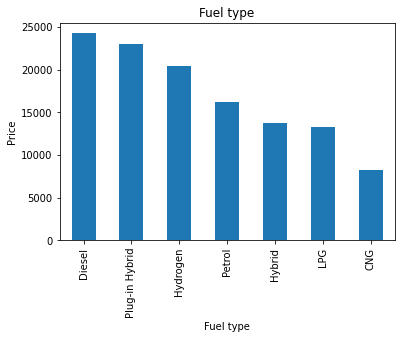

In [41]:
data.groupby('Fuel type')['Price'].mean().sort_values(ascending=False).plot.bar()
plt.xlabel('Fuel type')
plt.ylabel('Price')
plt.title('Fuel type')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

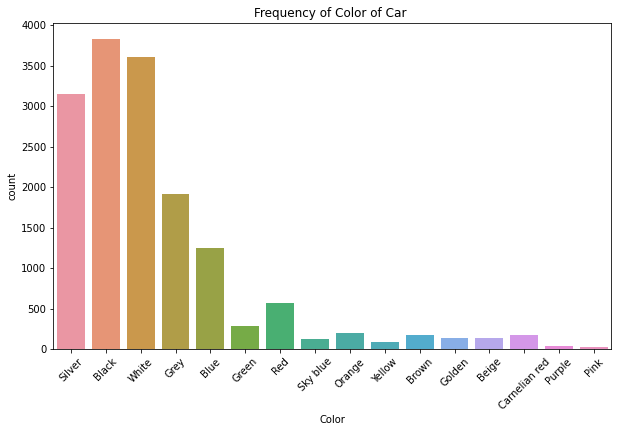

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='Color')  
plt.title('Frequency of Color of Car ')
plt.xticks(rotation=45)

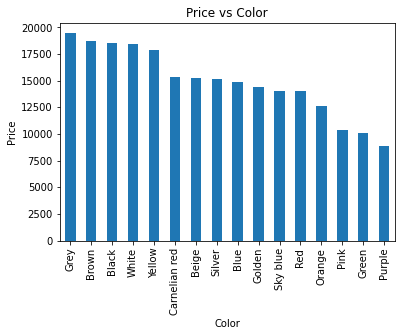

In [43]:
data.groupby('Color')['Price'].mean().sort_values(ascending=False).plot.bar()
plt.xlabel('Color')
plt.ylabel('Price')
plt.title('Price vs Color')
plt.show()

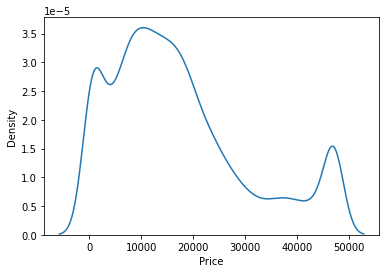

In [44]:
sns.kdeplot(x='Price',data=data)
plt.show()

In [45]:
data.describe()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,15724.000000,15724.000000,15724.000000,15724.000000,15724.000000,15724.0,15724.000000
mean,17099.349466,796.340626,2010.519651,2.168621,130569.937277,4.0,6.543755
std,13191.908279,140.053068,6.011611,0.660039,86333.553219,0.0,4.067522
min,1.000000,572.000000,1939.000000,0.500000,0.000000,4.0,0.000000
25%,7527.000000,746.000000,2008.000000,1.700000,66570.750000,4.0,4.000000
50%,14166.000000,781.000000,2012.000000,2.000000,121000.000000,4.0,6.000000
75%,23364.000000,862.000000,2014.000000,2.500000,180000.000000,4.0,12.000000
max,47119.500000,1036.000000,2020.000000,3.700000,350143.875000,4.0,16.000000


In [46]:
data['log_Price']=np.log(data['Price'])


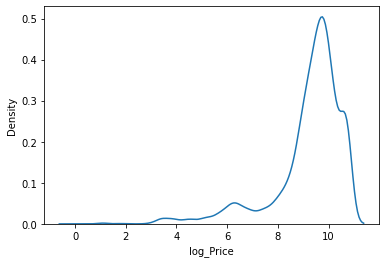

In [47]:
sns.kdeplot(x='log_Price',data=data)
plt.show()

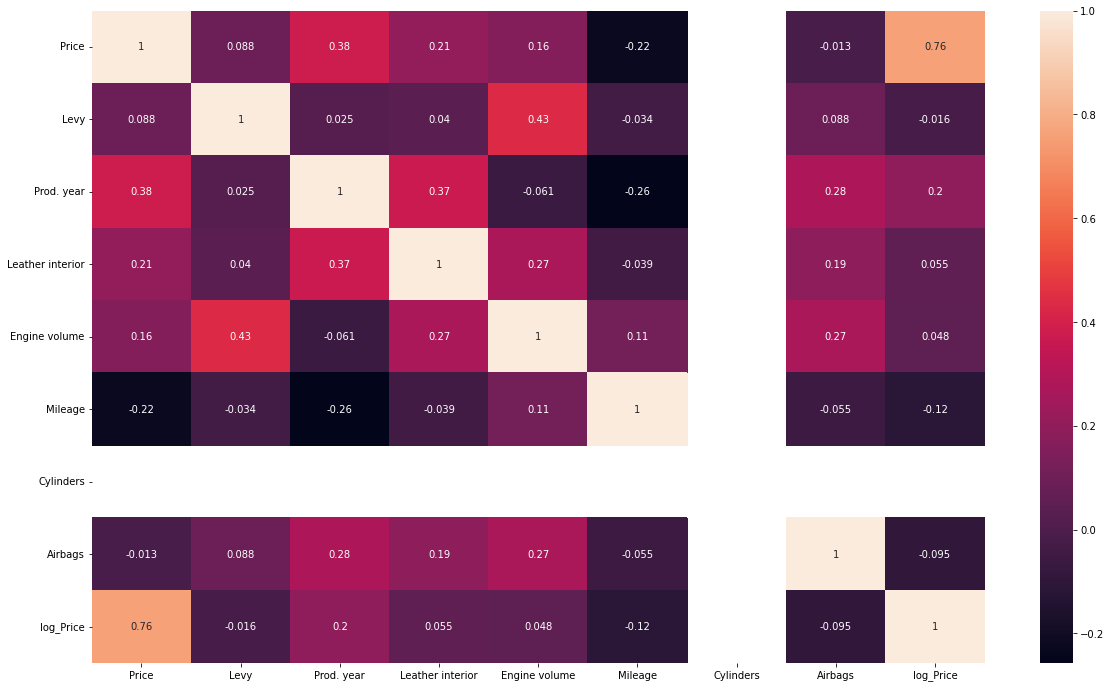

In [48]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot=True)

One Hot Encoding


In [49]:
dummy_encoded_variables = pd.get_dummies(data, drop_first = True)

In [50]:
dummy_encoded_variables.head()

,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Airbags,log_Price,Manufacturer_ALFA ROMEO,...,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Generation_Boomers-II,Generation_Gen-X,Generation_Gen-Z,Generation_Milennials,Generation_Post_war
0,13328.0,1036.0,2010,True,3.5,186005.0,4.0,12,9.497622,0,...,0,1,0,0,0,0,0,1,0,0
1,16621.0,1018.0,2011,False,3.0,192000.0,4.0,8,9.718422,0,...,0,0,0,0,0,0,0,1,0,0
2,8467.0,781.0,2006,False,1.3,200000.0,4.0,2,9.043932,0,...,0,0,0,0,0,0,0,1,0,0
3,3607.0,862.0,2011,True,2.5,168966.0,4.0,0,8.190632,0,...,0,0,0,1,0,0,0,1,0,0
4,11726.0,572.0,2014,True,1.3,91901.0,4.0,4,9.369564,0,...,0,1,0,0,0,0,0,1,0,0


Model Application

In [51]:
X=dummy_encoded_variables.drop(['Price','log_Price'],axis=1)
y=dummy_encoded_variables[['Price','log_Price']]

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (11793, 1704)
The shape of X_test is: (3931, 1704)
The shape of y_train is: (11793, 2)
The shape of y_test is: (3931, 2)


In [54]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [1]:
regression_model=[LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), SVR(kernel='poly')]

NameError: ignored

In [56]:
for i in range(0,len(regression_model)):
  regression_model[i].fit(x_train_scaled,y_train['Price'])
    
  print(f'{regression_model[i]}: ')
  y_pred_train=regression_model[i].predict(x_train_scaled)
  y_pred_test=regression_model[i].predict(X_test_scaled)
    
  print('R2 train: ',r2_score(y_train['Price'],y_pred_train))
  print('R2 test: ',r2_score(y_test['Price'],y_pred_test))
  

LinearRegression(): 
R2 train:  0.5252244617078261
R2 test:  -4.0179743010306264e+26
DecisionTreeRegressor(): 
R2 train:  0.9965137642862708
R2 test:  0.4915225013409583
RandomForestRegressor(): 
R2 train:  0.9594453126855882
R2 test:  0.7349202498605901
AdaBoostRegressor(): 
R2 train:  0.4216038006414259
R2 test:  0.40959095557599534
SVR(kernel='poly'): 
R2 train:  -0.0372568856070945
R2 test:  -0.033823634357187604


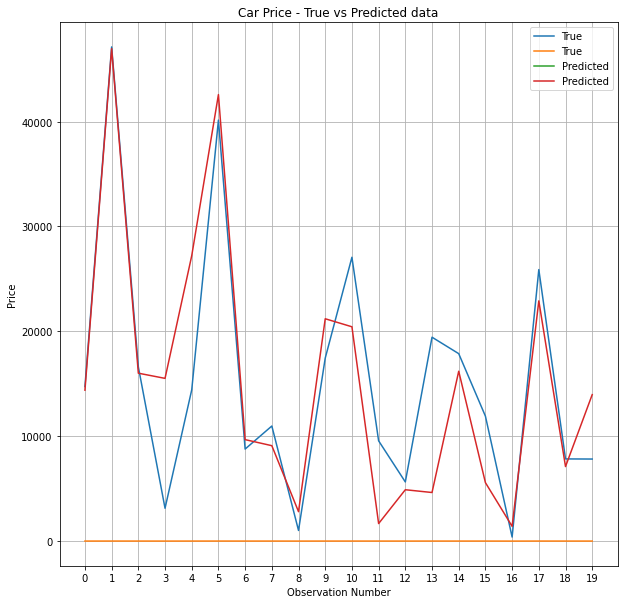

In [57]:
model=RandomForestRegressor()
model.fit(x_train_scaled,y_train)
y_pred=np.exp(model.predict(X_test_scaled))
number_of_observations=20
x_ax = range(len(y_test[:number_of_observations]))
plt.figure(figsize=(10,10))
plt.plot(x_ax, y_test[:number_of_observations], label="True")
plt.plot(x_ax, y_pred[:number_of_observations], label="Predicted")
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()

In [58]:
regression_model=[LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), SVR(kernel='poly')]

In [59]:
for i in range(0,len(regression_model)):
  regression_model[i].fit(x_train_scaled,y_train['log_Price'])
    
  print(f'{regression_model[i]}: ')
  y_pred_train=regression_model[i].predict(x_train_scaled)
  y_pred_test=regression_model[i].predict(X_test_scaled)
    
  print('R2 train: ',r2_score(y_train['log_Price'],y_pred_train))
  print('R2 test: ',r2_score(y_test['log_Price'],y_pred_test))

LinearRegression(): 
R2 train:  0.2628365439024687
R2 test:  -3.329855459946397e+26
DecisionTreeRegressor(): 
R2 train:  0.9939930080211404
R2 test:  0.010810829049371362
RandomForestRegressor(): 
R2 train:  0.9163187749400827
R2 test:  0.4257457187386051
AdaBoostRegressor(): 
R2 train:  -0.29674469453157926
R2 test:  -0.29444540654459583
SVR(kernel='poly'): 
R2 train:  0.07678293526875479
R2 test:  -0.019665665144145805


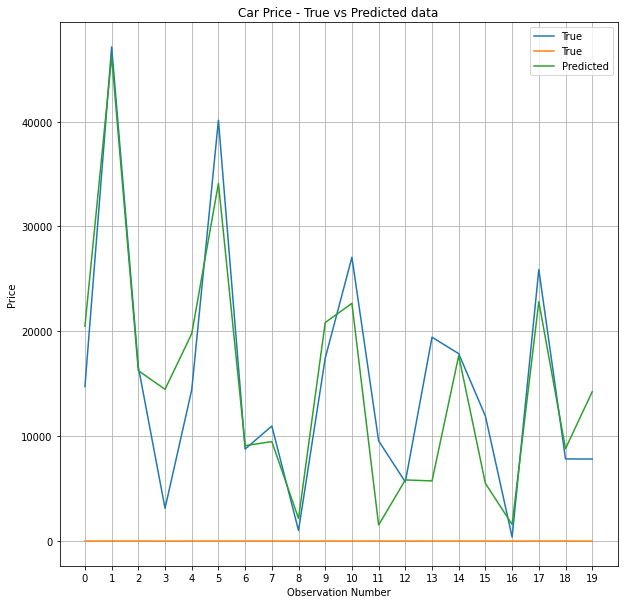

In [60]:
model=RandomForestRegressor()
model.fit(x_train_scaled,y_train['log_Price'])
y_pred=np.exp(model.predict(X_test_scaled))
number_of_observations=20
x_ax = range(len(y_test[:number_of_observations]))
plt.figure(figsize=(10,10))
plt.plot(x_ax, y_test[:number_of_observations], label="True")
plt.plot(x_ax, y_pred[:number_of_observations], label="Predicted")
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()

# THANK YOU